In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

#Least Squares

## 1 Introduction

We are interested in estimating the parameters of the population regression model:

\begin{equation}
\mathbf{Y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}
\end{equation}

where:

\begin{equation}
\mathbf{Y} =
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{pmatrix},
\quad
\mathbf{X} =
\begin{pmatrix}
1 & x_{1,1} & x_{2,1} & \dots & x_{k,1} \\
1 & x_{1,2} & x_{2,2} & \dots & x_{k,1} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{1,n} & x_{2,n} & \dots & x_{k,n}
\end{pmatrix},
\quad
\boldsymbol{\beta} =
\begin{pmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_k
\end{pmatrix},
\quad
\boldsymbol{\epsilon} =
\begin{pmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_n
\end{pmatrix}
\end{equation}

The population parameters are $\beta$, $\sigma^2$, and $\epsilon$, where $\beta$ is a $k+1 \times n$ matrix for a regression with $k$ independent variables, $\sigma^2$ is the population variance of the error terms, and $\epsilon$ is the $N \times 1$ matrix of population error terms. The sample counterparts are $b$, $s^2$, and $e$. The sample errors are referred to as the residuals.

## 2 Least Squares

### 2.1 The Problem

We want to estimate $\beta$, i.e., the intercept and slopes, that makes the line as close as possible to the data. "Least Squares" applies the following criteria:

\begin{equation}
\min_b e'e = (Y-Xb)'(Y-Xb) = Y'Y - b'X'Y - Y'Xb + b'X'Xb
\end{equation}

Note that
\begin{equation}
e =
\begin{pmatrix}
e_1 \\
e_2 \\
\vdots \\
e_n
\end{pmatrix}
=
\begin{pmatrix}
y_1 - b_0 - b_1x_{1,1} - b_2x_{2,1} - \dots - b_kx_{k,1}\\
y_2 - b_0 - b_1x_{1,2} - b_2x_{2,2} - \dots - b_kx_{k,2}\\
\vdots \\
y_n - b_0 - b_1x_{1,n} - b_2x_{2,n} - \dots - b_kx_{k,n}
\end{pmatrix}
\end{equation}
and
\begin{equation}
e'e =
\begin{pmatrix}
e_1 & e_2 & \dots & e_n
\end{pmatrix}
\begin{pmatrix}
e_1 \\
e_2 \\
\vdots \\
e_n
\end{pmatrix}
= \sum_{i=1}^ne_i^2
\end{equation}
We define the line of best fit as that which minimizes the sum of squared errors. This is known as the "least squares" criteria.

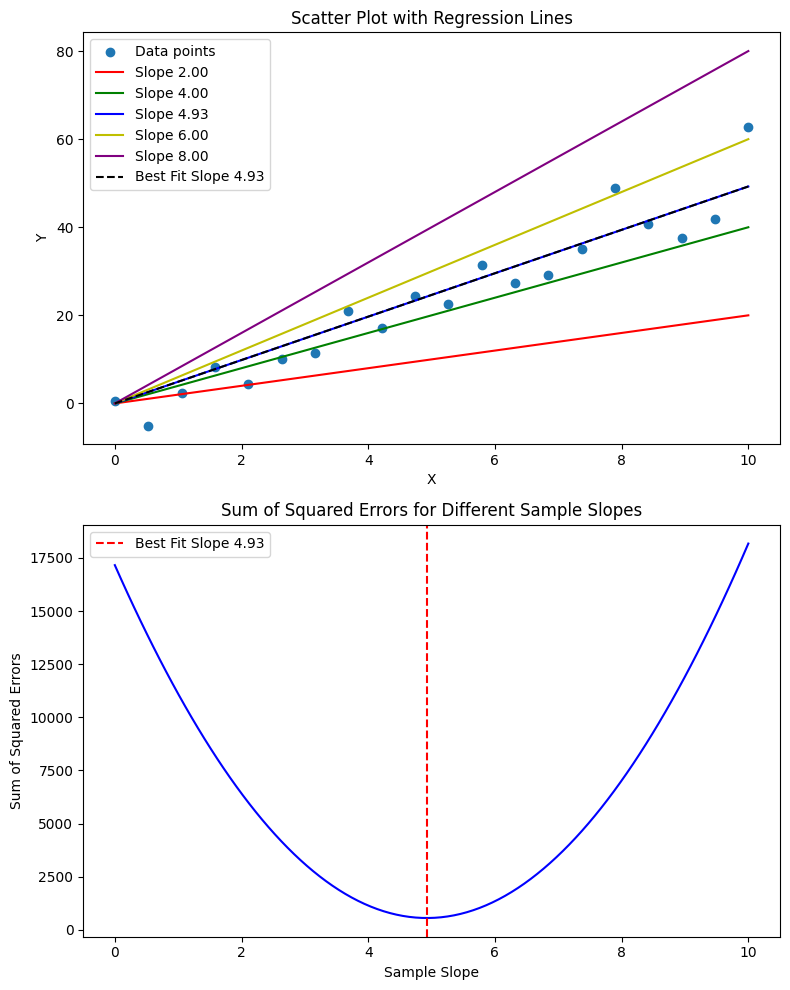

In [ ]:
# Generate data following the population line y = 5x (slope = 5, intercept = 0)
np.random.seed(16)
X = np.linspace(0, 10, 20).reshape(-1, 1)
true_slope = 5
y_true = true_slope * X.flatten()

# Adding some noise to simulate real-world data
y = y_true + np.random.normal(0, 5, size=y_true.shape)

# Fit a line of best fit using Linear Regression
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
best_fit_slope = model.coef_[0]
y_pred = model.predict(X)

# Prepare to plot scatter points and regression lines
slopes = [2, 4, best_fit_slope, 6, 8]  # Different example slopes
colors = ['r', 'g', 'b', 'y', 'purple']

# Calculate SSE for different slopes
slope_range = np.linspace(0, 10, 100)
sse_values = []
for slope in slope_range:
    y_pred_slope = slope * X.flatten()
    sse = np.sum((y - y_pred_slope) ** 2)
    sse_values.append(sse)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Scatter plot with points and regression lines
ax1.scatter(X, y, label='Data points')
for slope, color in zip(slopes, colors):
    ax1.plot(X, slope * X, label=f'Slope {slope:.2f}', color=color)
ax1.plot(X, y_pred, label=f'Best Fit Slope {best_fit_slope:.2f}', color='black', linestyle='--')
ax1.set_title('Scatter Plot with Regression Lines')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.legend()

# Plot sum of squared errors
ax2.plot(slope_range, sse_values, color='blue')
ax2.set_title('Sum of Squared Errors for Different Sample Slopes')
ax2.set_xlabel('Sample Slope')
ax2.set_ylabel('Sum of Squared Errors')
ax2.axvline(best_fit_slope, color='red', linestyle='--', label=f'Best Fit Slope {best_fit_slope:.2f}')
ax2.legend()

plt.tight_layout()
plt.show()

We can use matrix calculus to solve the miniminization problem.

\begin{equation}
\frac{\delta e'e}{\delta b} = 0 \;\; \Rightarrow \;\; -2X'Y + 2X'Xb = 0 \;\; \Rightarrow \;\; b = (X'X)^{-1}X'Y
\end{equation}

We would also like to ensure the above first-order condition defines a minimum so we check the second order condition:

\begin{equation}
\frac{\delta^2 (e'e)}{\delta b\delta b'} = 2X'X
\end{equation}

which will satisfy the condition for a global minimum if $X'X$ is a positive definite matrix, which in turn will be satisfied if $X$ is of full rank.

### 2.2 Example

Consider a bivariate ("simple") linear regression where $Y=$ undergraduate annual enrollment at Weber State, and $X = $ Utah unemployment rate. Assume the population regression euqation is:

\begin{equation}
y_t = \beta_0 + \beta_1x_t + \epsilon_t
\end{equation}

There are $T$ observations in the time series sample (e.g., T years of data). After taking a sample, we want to select $b_0$ the sample intercept, and $b_1$, the sample slope, to minimize

\begin{equation}
\sum_{t=1}^T e_t^2 = \sum_{t=1}^T (y_t - b_0 - b_1x_t)^2.
\end{equation}

The first order conditions are

\begin{equation}
\frac{\delta \left(\sum_t e_t^2 \right)}{\delta b_0} = -2\sum_t(y_t - b_0 - b_1x_t) = 0
\end{equation}
and
\begin{equation}
\frac{\delta \left(\sum_t e_t^2 \right)}{\delta b_1} = -2\sum_t(y_t - b_0 - b_1x_t)x_t = 0
\end{equation}

We rearrange these first-order conditions to find the **normal equations**:

\begin{equation}
\sum_t y_t = Tb_0 + b_1\sum_tx_t
\end{equation}
and
\begin{equation}
\sum_t y_tx_t = b_0\sum_tx_t + b_1\sum_tx_t^2
\end{equation}

Finally, we can solve the normal equations for $b_0$ and $b_1$:

\begin{equation}
b_0 = \bar{y} - b_1 \bar{x}
\end{equation}
and
\begin{equation}
b_1 = \frac{\sum_t(y_t - \bar{y})(x_t - \bar{x})}{\sum_t(x_t - \bar{x})^2} = \frac{COV(X,Y)}{VAR(X)}
\end{equation}

###2.3 Algebra of Least Squares

Consider the matrix first-order condition/normal equation

\begin{equation}
-2X'Y + 2X'X = 0 \;\; \Rightarrow X'Y - X'X = 0 \;\; \Rightarrow \;\; X'(Y-Xb) = X'e = 0
\end{equation}

If we have constant/intercept term in the regression equation, then the first column of $X$ is all ones. This means that if we have a constant/intercept term, then

\begin{equation}
X'e = 0 \;\; \Rightarrow \;\; \sum_i e_i = 0
\end{equation}

So, if we include a constant term, the positive and negative residuals cancel eachother out.

You can also use the condition $\sum_i e_i = 0$ to show that the regression equation passes through the sample means on the homework.

Finally, we can use the condition $X'e = 0$ to show that the **fitted values** (predicted values of $Y$ from the regression line) are orthogonal to the residuals:

\begin{equation}
\hat{Y'}e = (Xb)'e = b'X'e = 0
\end{equation}

This means that there is no overlapping statistical information between the fitted values (what can be explained by the model) and the residuals (what cannot be exlained by the model.)

### 2.4 Goodness of Fit and Analysis of Variance

We now assess how well the regression model fits the data. Let's start by writing the regression model
\begin{equation}
Y = Xb + e
\end{equation}

in deviation from mean form. Start by defining the matrix, $M^0$:

\begin{equation}
M^0 = I_n - \frac{1}{n}ii' =
\begin{pmatrix}
1 - \frac{1}{n} & -\frac{1}{n} & \dots & -\frac{1}{n} \\
-\frac{1}{n} & 1 - \frac{1}{n}  & \dots & -\frac{1}{n} \\
\vdots & \vdots & \ddots & \vdots \\
-\frac{1}{n} & -\frac{1}{n} & \dots & 1 - \frac{1}{n}
\end{pmatrix}
\end{equation}

Now, write

\begin{equation}
Y - \bar{Y} = M^0Y = M^0(Xb + e) = M^0Xb + e
\end{equation}

The left hand side is a vector of deviations between $y_i$ and $\bar{y}$ while the right hand side is a vector of deviations between fitted values, $\hat{y_i}$ and $\bar{y}$ added to a vector of errors. Note that each of these sum to zero.

We can pre-multiply the above equation by it's transpose to understand goodness of fit:

\begin{equation}
(Y-\bar{Y})'(Y-\bar{Y}) = Y'M^0Y = b'X'M^0Xb+e'e \;\; \Rightarrow \;\; SST = SSR + SSE
\end{equation}

where $SST$ is the sum of squares total, or total variation of the dependent variable around it's mean in the sample. The right had side shows this variation can be broken down into two components: $SSR$ is the part of the total varation that can be explained by the regresson model, while $SSE$ is the part of the total variation that cannot be explained. We usully divide through by $SST$ in order to understand these magnitudes as proportion of the total vairation:

\begin{equation}
R^2 = \frac{SSR}{SST} = 1-\frac{SSE}{SST}.
\end{equation}

Another common measure of goodness of fit is the Mean Squared Error (MSE):

\begin{equation}
MSE = \frac{1}{n}\sum_i\left(y_i -\hat{y_i}\right)^2
\end{equation}

In [ ]:
# Set seed for reproducibility
np.random.seed(16)

# Generate data for a quadratic relationship (true equation: y = 2x^2 + 3x + 5)
n_samples = 50
X = np.random.uniform(-3, 3, n_samples).reshape(-1, 1)
y_true = 2 * X**2 + 3 * X + 5 + np.random.normal(0, 1, X.shape)

# Split into in-sample and out-of-sample data
X_in_sample = X[:40]
y_in_sample = y_true[:40]

X_out_of_sample = X[40:]
y_out_of_sample = y_true[40:]

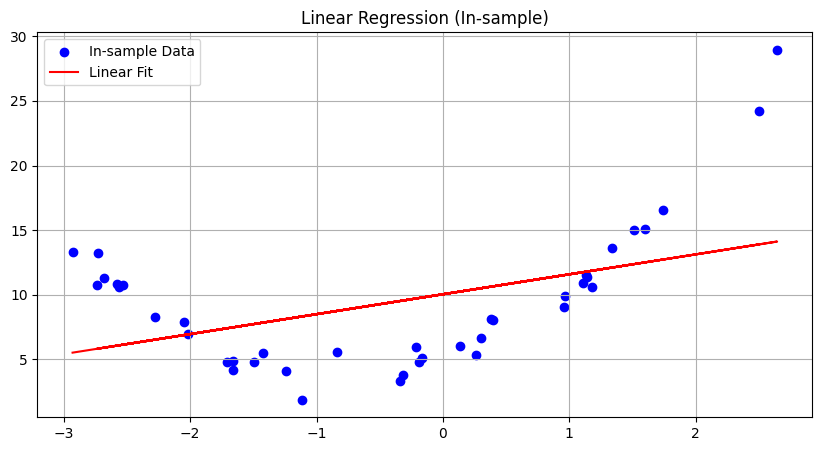

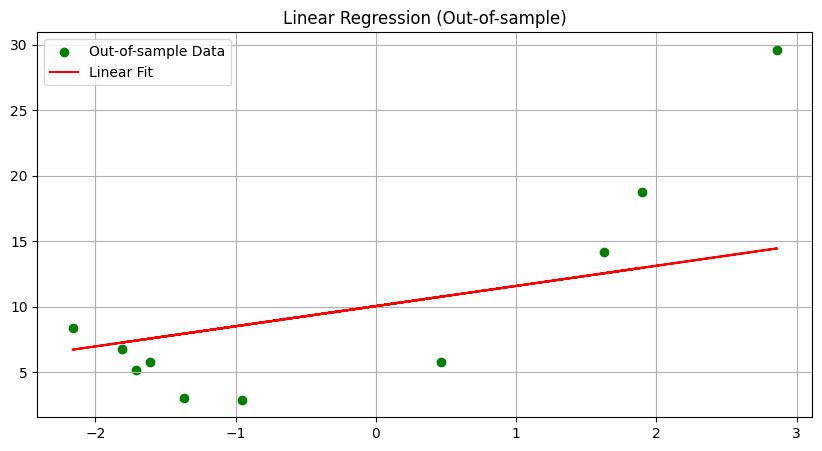

Linear Model In-sample MSE: 22.860396271924987
Linear Model Out-of-sample MSE: 35.93355487909746


In [ ]:
# Fit a simple linear regression model
model_linear = LinearRegression()
model_linear.fit(X_in_sample, y_in_sample)

# Predict in-sample and out-of-sample
y_pred_in_sample = model_linear.predict(X_in_sample)
y_pred_out_of_sample = model_linear.predict(X_out_of_sample)

# Plot in-sample performance
plt.figure(figsize=(10, 5))
plt.scatter(X_in_sample, y_in_sample, color='blue', label='In-sample Data')
plt.plot(X_in_sample, y_pred_in_sample, color='red', label='Linear Fit')
plt.title('Linear Regression (In-sample)')
plt.legend()
plt.grid(True)
plt.show()

# Plot out-of-sample performance
plt.figure(figsize=(10, 5))
plt.scatter(X_out_of_sample, y_out_of_sample, color='green', label='Out-of-sample Data')
plt.plot(X_out_of_sample, y_pred_out_of_sample, color='red', label='Linear Fit')
plt.title('Linear Regression (Out-of-sample)')
plt.legend()
plt.grid(True)
plt.show()

# Print Mean Squared Errors
print("Linear Model In-sample MSE:", mean_squared_error(y_in_sample, y_pred_in_sample))
print("Linear Model Out-of-sample MSE:", mean_squared_error(y_out_of_sample, y_pred_out_of_sample))

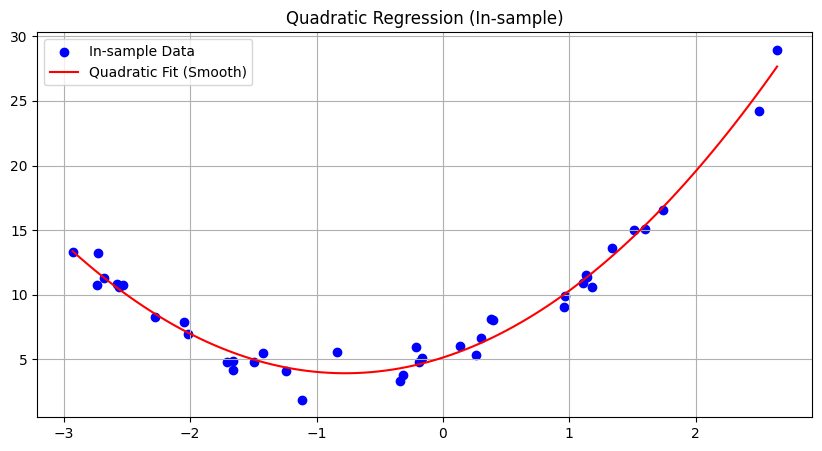

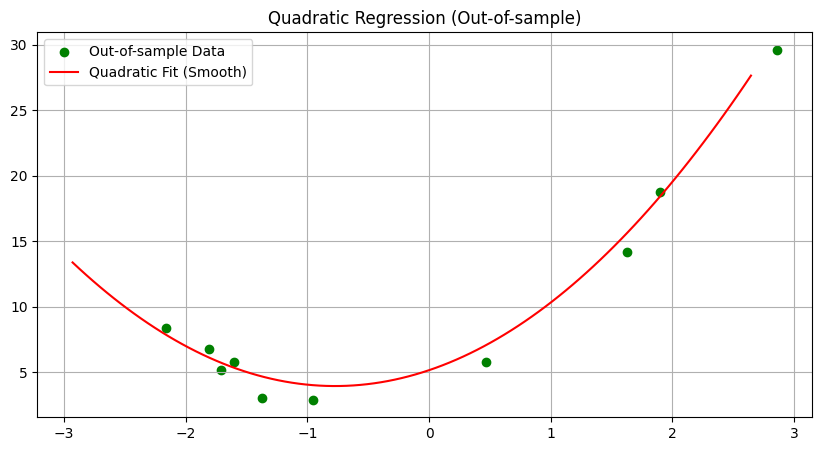

Quadratic Model In-sample MSE: 0.7747917165983015
Quadratic Model Out-of-sample MSE: 1.0231813044236655


In [ ]:
# Set seed for reproducibility
np.random.seed(16)

# Split into in-sample and out-of-sample data
X_in_sample = X[:40]
y_in_sample = y_true[:40]

X_out_of_sample = X[40:]
y_out_of_sample = y_true[40:]

# Add quadratic features
poly = PolynomialFeatures(degree=2)
X_in_sample_quad = poly.fit_transform(X_in_sample)
X_out_of_sample_quad = poly.transform(X_out_of_sample)

# Fit quadratic regression model
model_quad = LinearRegression()
model_quad.fit(X_in_sample_quad, y_in_sample)

# Generate smooth X values for plotting the quadratic fit line
X_smooth = np.linspace(X_in_sample.min(), X_in_sample.max(), 100).reshape(-1, 1)
X_smooth_quad = poly.transform(X_smooth)  # Transform to match polynomial features
y_smooth_quad = model_quad.predict(X_smooth_quad)

# Plot in-sample performance with smooth line
plt.figure(figsize=(10, 5))
plt.scatter(X_in_sample, y_in_sample, color='blue', label='In-sample Data')
plt.plot(X_smooth, y_smooth_quad, color='red', label='Quadratic Fit (Smooth)')
plt.title('Quadratic Regression (In-sample)')
plt.legend()
plt.grid(True)
plt.show()

# Generate smooth X values for out-of-sample performance plot
y_smooth_out_of_sample_quad = model_quad.predict(X_out_of_sample_quad)

# Plot out-of-sample performance with smooth line
plt.figure(figsize=(10, 5))
plt.scatter(X_out_of_sample, y_out_of_sample, color='green', label='Out-of-sample Data')
plt.plot(X_smooth, y_smooth_quad, color='red', label='Quadratic Fit (Smooth)')
plt.title('Quadratic Regression (Out-of-sample)')
plt.legend()
plt.grid(True)
plt.show()

# Print Mean Squared Errors and R-squared
print("Quadratic Model In-sample MSE:", mean_squared_error(y_in_sample, model_quad.predict(X_in_sample_quad)))
print("Quadratic Model Out-of-sample MSE:", mean_squared_error(y_out_of_sample, model_quad.predict(X_out_of_sample_quad)))

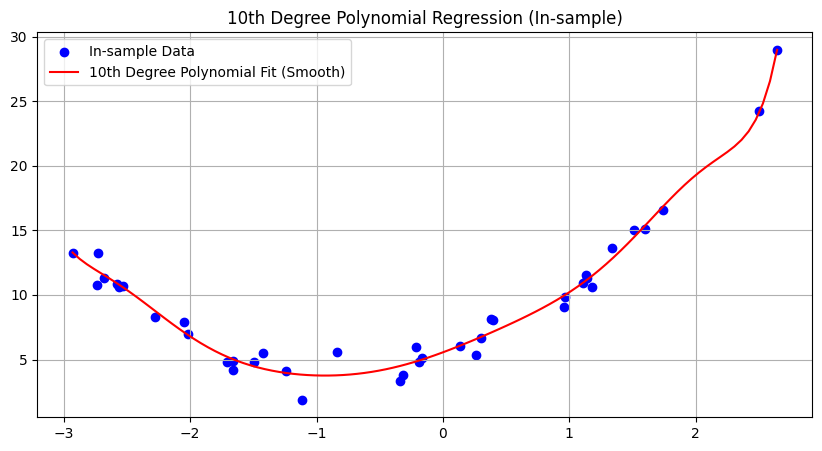

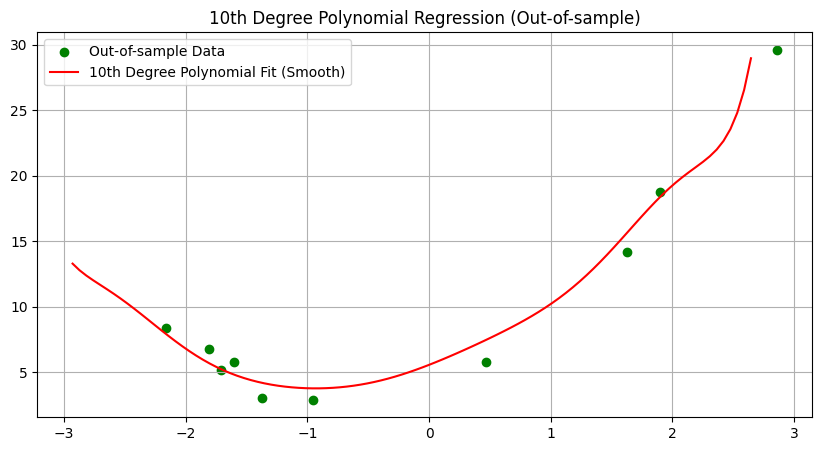

10th Degree Polynomial Model In-sample MSE: 0.5731029941581118
10th Degree Polynomial Model Out-of-sample MSE: 39.28934684394709


In [ ]:
# Add higher-degree polynomial features (degree=10 for overfitting)
poly_high = PolynomialFeatures(degree=10)
X_in_sample_high = poly_high.fit_transform(X_in_sample)
X_out_of_sample_high = poly_high.transform(X_out_of_sample)

# Fit the high-degree polynomial model (overfitting model)
model_high = LinearRegression()
model_high.fit(X_in_sample_high, y_in_sample)

# Generate smooth X values for plotting the high-degree polynomial fit line
X_smooth_high = poly_high.transform(X_smooth)
y_smooth_high = model_high.predict(X_smooth_high)

# Plot in-sample performance with smooth line for overfitting model
plt.figure(figsize=(10, 5))
plt.scatter(X_in_sample, y_in_sample, color='blue', label='In-sample Data')
plt.plot(X_smooth, y_smooth_high, color='red', label='10th Degree Polynomial Fit (Smooth)')
plt.title('10th Degree Polynomial Regression (In-sample)')
plt.legend()
plt.grid(True)
plt.show()

# Plot out-of-sample performance with smooth line for overfitting model
plt.figure(figsize=(10, 5))
plt.scatter(X_out_of_sample, y_out_of_sample, color='green', label='Out-of-sample Data')
plt.plot(X_smooth, y_smooth_high, color='red', label='10th Degree Polynomial Fit (Smooth)')
plt.title('10th Degree Polynomial Regression (Out-of-sample)')
plt.legend()
plt.grid(True)
plt.show()

# Print Mean Squared Errors and R-squared for the overfitting model
print("10th Degree Polynomial Model In-sample MSE:", mean_squared_error(y_in_sample, model_high.predict(X_in_sample_high)))
print("10th Degree Polynomial Model Out-of-sample MSE:", mean_squared_error(y_out_of_sample, model_high.predict(X_out_of_sample_high)))